# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [4]:
# H_0 = Your null hypothesis
# There is no significant difference in response rate between the new and the current email templates
mu_0 = 0.05
mu = 0.06
sigma = 0.0475

H_O: mu <= mu_0 # H0: U <= U0

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [5]:
# H_1 = Your alternative hypothesis
# The response rate of the new email template is significantly higher than the current template
H_1: mu > mu_0

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [10]:
# Calculate the required sample size
from statsmodels.stats.power import TTestIndPower

alpha = 0.05
power = 0.8
beta = 1 - power
effect_size = (mu-mu_0) / sigma # Normalized effect size = difference of mean values / population SD

# Calculate required sample size for a one-sided test
sample_size = TTestIndPower().solve_power(power=power, effect_size=effect_size, 
                                          alpha=alpha, alternative='larger')

print("alpha :>", alpha)
print("beta :>", round(beta, 1))
print("Sample size :>", int(sample_size))

alpha :> 0.05
beta :> 0.2
Sample size :> 279


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

In [14]:
import numpy as np
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid') # Nice background styling on plots

Sample size for an alpha of 0.01 = 529
Sample size for a response rate difference of 0.03 = 60


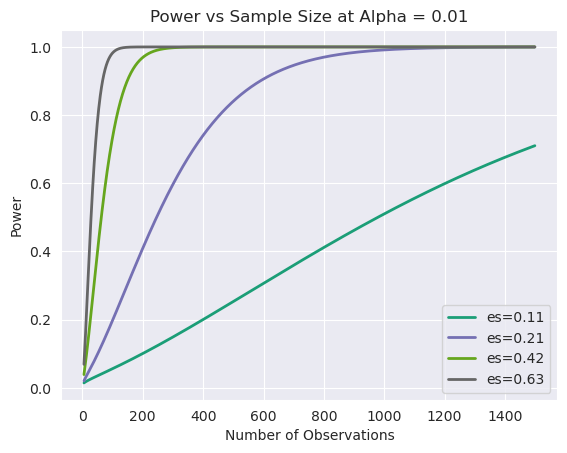

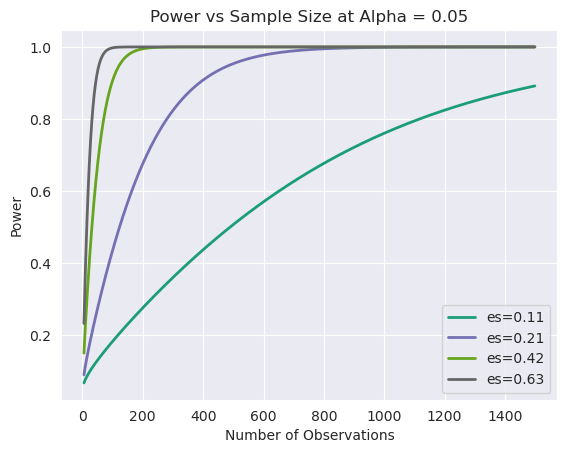

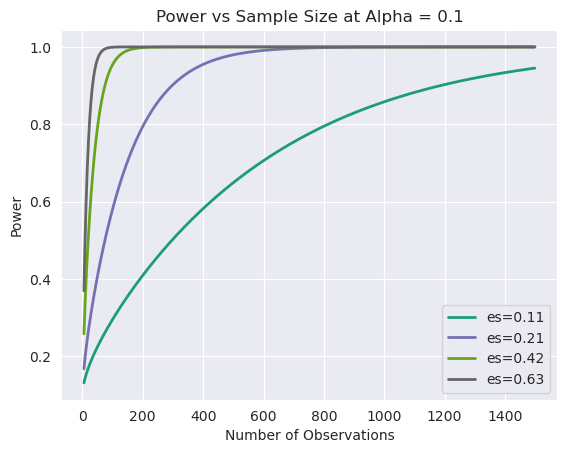

In [15]:
#Your code; plot power curves for the various alpha and effect size combinations
# Sample size for alpha = 0.01 
new_sample_size1 = TTestIndPower().solve_power(power=power, effect_size=effect_size, alpha=0.01)
print("Sample size for an alpha of 0.01 =", round(new_sample_size1))

# Sample size for mu=0.08, alpha=0.05, and power=0.8
mu_new = 0.08
sigma = 0.0475
new_sample_size2 = TTestIndPower().solve_power(power=power, effect_size=((mu_new-mu_0) / sigma), alpha=alpha)
print("Sample size for a response rate difference of 0.03 =", round(new_sample_size2))

# Plotting power vs sample size curves at different alpha values
alpha_values = [.01, .05, .1]
for alpha in alpha_values:
    power_analysis = TTestIndPower()
    power_analysis.plot_power(dep_var='nobs',
                              nobs = np.array(range(5, 1500)),
                              effect_size=np.array([x/sigma for x in [.005, .01, .02, .03]]),
                              alpha=alpha,
                              alternative='larger',
                              title=f'Power vs Sample Size at Alpha = {alpha}',
                              )
    plt.ylabel('Power');

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [16]:
print(""" Our computation shows that to detect 1% increase in response rate at a significance level of 5%, 
the sample size needs to be at least 279.

The simulation of statistical power against sample size at varying levels of effect size shows that statistical power 
(the ability to prove that there is a significant increase in response rate) increases with the sample size. The increase 
is also steeper, the higher the alpha or significance level. It can be seen that it is most difficult to achieve a statistical
power of 0.8 when the significance level is 0.01.

It is worth noticing that for all simulations, when the sample size is about 1,000, the statistical powers for a response
rate rise of 0.005, 0.01, and 0.02, are almost equal and very close to 1.0. Therefore, a sample size of 1,000 or more is not
appropriate for comparing different effect sizes. I therefore recommend a sample size of between 300 and 600.  

We also notice that the higher the effect size, the steeper the relationship between statistical power and sample size.
Going by this, targeting a response rate rise of 0.02 and 0.03 (effect size of about 0.42 and 0.63 respectively) is 
too high for any possibility of failing to reject the null hypothesis that the new email campaign has no significant effect 
on the response rate. 

We also notice that across all simulations (alpha level 0.01, 0.05, and 0.1), when the sample size is less that 1,000,
the statistical power for a response rate rise of 0.005 is below 0.8. This could make it difficult to prove the 
significant effect of a new email campaign.

Based on the above analysis, I recommend an experimental design that involves a sample size of between 300 and 600, 
targeting a response rate rise of between 0.01 and 0.02, at a significance level of between 0.05 and 0.1.

""")

 Our computation shows that to detect 1% increase in response rate at a significance level of 5%, 
the sample size needs to be at least 279.

The simulation of statistical power against sample size at varying levels of effect size shows that statistical power 
(the ability to prove that there is a significant increase in response rate) increases with the sample size. The increase 
is also steeper, the higher the alpha or significance level. It can be seen that it is most difficult to achieve a statistical
power of 0.8 when the significance level is 0.01.

It is worth noticing that for all simulations, when the sample size is about 1,000, the statistical powers for a response
rate rise of 0.005, 0.01, and 0.02, are almost equal and very close to 1.0. Therefore, a sample size of 1,000 or more is not
appropriate for comparing different effect sizes. I therefore recommend a sample size of between 300 and 600.  

We also notice that the higher the effect size, the steeper the relationship b

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.